# Confidence Intervals
---

Tonight, we'll be collecting data from accross the world and calculating confidence intervals—fun!

In [6]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [7]:
full_data = Table.read_table("Life Expectancy Data.csv")

In [8]:
full_data

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Afghanistan,2015,Developing,65,263,62,0.01,71.2796,65,1154,19.1,83,6,8.16,65,0.1,584.259,3.37365e+07,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.5236,62,492,18.6,86,58,8.18,62,0.1,612.697,327582,17.5,17.5,0.476,10
Afghanistan,2013,Developing,59.9,268,66,0.01,73.2192,64,430,18.1,89,62,8.13,64,0.1,631.745,3.17317e+07,17.7,17.7,0.47,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.1842,67,2787,17.6,93,67,8.52,67,0.1,669.959,3.69696e+06,17.9,18,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.09711,68,3013,17.2,97,68,7.87,68,0.1,63.5372,2.9786e+06,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.6794,66,1989,16.7,102,66,9.2,66,0.1,553.329,2.88317e+06,18.4,18.4,0.448,9.2
Afghanistan,2009,Developing,58.6,281,77,0.01,56.7622,63,2861,16.2,106,63,9.42,63,0.1,445.893,284331,18.6,18.7,0.434,8.9
Afghanistan,2008,Developing,58.1,287,80,0.03,25.8739,64,1599,15.7,110,64,8.33,64,0.1,373.361,2.72943e+06,18.8,18.9,0.433,8.7
Afghanistan,2007,Developing,57.5,295,82,0.02,10.9102,63,1141,15.2,113,63,6.73,63,0.1,369.836,2.66168e+07,19,19.1,0.415,8.4
Afghanistan,2006,Developing,57.3,295,84,0.03,17.1715,64,1990,14.7,116,58,7.43,58,0.1,272.564,2.58934e+06,19.2,19.3,0.405,8.1


This data comes from the World Health Organization.  We can learn more about the meanings of the columns by looking here: https://www.kaggle.com/kumarajarshi/life-expectancy-who

Let's travel back in time to the year 2015 and collect some data!  For the duration of this discussion, we're going to consider the following data to be our *"population"*.

Let's take a look at it.

In [11]:
recent_data = full_data.where("Year", 2015)

In [12]:
recent_data

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Afghanistan,2015,Developing,65,263,62,0.01,71.2796,65,1154,19.1,83,6,8.16,65,0.1,584.259,3.37365e+07,17.2,17.3,0.479,10.1
Albania,2015,Developing,77.8,74,0,4.6,364.975,99,0,58,0,99,6,99,0.1,3954.23,28873,1.2,1.3,0.762,14.2
Algeria,2015,Developing,75.6,19,21,nan,0,95,63,59.5,24,95,nan,95,0.1,4132.76,3.98715e+07,6,5.8,0.743,14.4
Angola,2015,Developing,52.4,335,66,nan,0,64,118,23.3,98,7,nan,64,1.9,3695.79,2.78594e+06,8.3,8.2,0.531,11.4
Antigua and Barbuda,2015,Developing,76.4,13,0,nan,0,99,0,47.7,0,86,nan,99,0.2,13567,nan,3.3,3.3,0.784,13.9
Argentina,2015,Developing,76.3,116,8,nan,0,94,0,62.8,9,93,nan,94,0.1,13467.1,4.34178e+07,1,0.9,0.826,17.3
Armenia,2015,Developing,74.8,118,1,nan,0,94,33,54.9,1,96,nan,94,0.1,369.655,291695,2.1,2.2,0.741,12.7
Australia,2015,Developed,82.8,59,1,nan,0,93,74,66.6,1,93,nan,93,0.1,56554.4,2.37893e+07,0.6,0.6,0.937,20.4
Austria,2015,Developed,81.5,65,0,nan,0,93,309,57.6,0,93,nan,93,0.1,43665.9,8.63317e+06,1.9,2.1,0.892,15.9
Azerbaijan,2015,Developing,72.7,118,5,nan,0,96,0,52.5,6,98,nan,96,0.1,55.3138,9.64934e+06,2.8,2.9,0.758,12.7


In [13]:
# Let's visualize our population distribution.

# Defining a function to create bins easily
def get_bins(array, bin_size=1):
    return np.arange(
        int(min(array)), int(max(array)) + 1 + bin_size, bin_size
    )

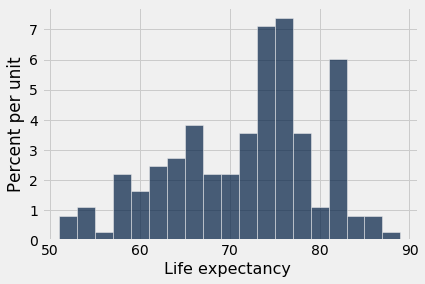

In [44]:
MEASURE = 3

data = recent_data.where(MEASURE, are.above_or_equal_to(0)) # This is just to remove nans

measured = data.column(MEASURE)

bins = get_bins(measured, 2) # <-- Try playing around with the bin size

data.hist(MEASURE, bins=bins)

In [45]:
# This is our ... ?

```
POPULATION DISTRIBUTION
```

So, what is our aim?  We want to estimate the average life expectancy for the globe!  Let's say we don't have access to the entire population.  Flying around the world is pretty expensive, so we can only collect data from 15 countries

As are standard procedures, we'll be creating a confidence interval around this estimate.  We can sample and use bootstrapping to find this.

In [46]:
# How do we create a representative sample?
collected = data.sample(15, with_replacement=False)

In [47]:
collected

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Malawi,2015,Developing,58.3,365,26,nan,0,88,0,19.6,38,88,nan,88,4.8,362.658,1.75737e+06,6.4,6.2,0.473,10.8
Eritrea,2015,Developing,64.7,255,5,nan,0,95,198,18.6,7,95,nan,95,0.4,nan,nan,8.4,8.2,0.418,5
Luxembourg,2015,Developed,82,63,0,nan,0,94,0,61.3,0,99,nan,99,0.1,1199.82,56964,1,0.9,0.896,13.9
Barbados,2015,Developing,75.5,98,0,nan,0,97,0,54.5,0,97,nan,97,0.1,15557.8,nan,3.8,3.7,0.794,15.3
Chile,2015,Developing,85,82,2,nan,0,97,9,63.8,2,96,nan,96,0.1,13653.2,1.77627e+07,0.8,0.8,0.845,16.3
Niger,2015,Developing,61.8,22,49,nan,0,65,7693,19.3,87,65,nan,65,0.4,358.997,1.9897e+07,9.6,9.4,0.351,5.4
Gabon,2015,Developing,66,229,2,nan,0,8,27,36.3,3,79,nan,8,2.7,7388.98,193175,6.1,5.9,0.694,12.6
Malta,2015,Developed,81.7,54,0,nan,0,95,2,69.6,0,97,nan,97,0.1,23819.5,431874,0.8,0.8,0.853,14.6
Syrian Arab Republic,2015,Developing,64.5,293,6,nan,0,41,45,57.1,8,5,nan,41,0.1,nan,1.8735e+07,6.3,6.1,0.553,9
Tonga,2015,Developing,73.5,133,0,nan,0,78,0,75.2,0,8,nan,78,0.1,493.775,16364,0.1,0.1,0.718,14.3


In [94]:
collected.sample()

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Barbados,2015,Developing,75.5,98,0,nan,0,97,0,54.5,0,97,nan,97,0.1,15557.8,nan,3.8,3.7,0.794,15.3
Comoros,2015,Developing,63.5,227,1,nan,0,91,0,24.2,2,92,nan,91,0.8,727.646,777424,6.7,6.5,0.498,11.1
Chile,2015,Developing,85,82,2,nan,0,97,9,63.8,2,96,nan,96,0.1,13653.2,1.77627e+07,0.8,0.8,0.845,16.3
Central African Republic,2015,Developing,52.5,397,15,nan,0,47,150,22.7,21,47,nan,47,4.4,348.381,45461,8.2,8.2,0.347,7.1
Mali,2015,Developing,58.2,266,52,nan,0,64,215,23.8,84,66,nan,64,1.5,729.725,1.7468e+06,7.7,7.5,0.438,8.4
Barbados,2015,Developing,75.5,98,0,nan,0,97,0,54.5,0,97,nan,97,0.1,15557.8,nan,3.8,3.7,0.794,15.3
Niger,2015,Developing,61.8,22,49,nan,0,65,7693,19.3,87,65,nan,65,0.4,358.997,1.9897e+07,9.6,9.4,0.351,5.4
Malawi,2015,Developing,58.3,365,26,nan,0,88,0,19.6,38,88,nan,88,4.8,362.658,1.75737e+06,6.4,6.2,0.473,10.8
Comoros,2015,Developing,63.5,227,1,nan,0,91,0,24.2,2,92,nan,91,0.8,727.646,777424,6.7,6.5,0.498,11.1
Syrian Arab Republic,2015,Developing,64.5,293,6,nan,0,41,45,57.1,8,5,nan,41,0.1,nan,1.8735e+07,6.3,6.1,0.553,9


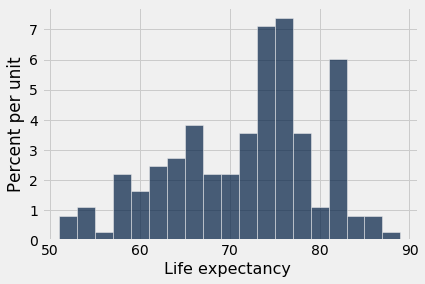

In [30]:
data.hist(MEASURE, bins=bins)

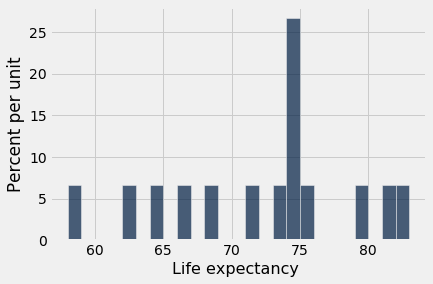

In [31]:
collected.hist(MEASURE, bins=get_bins(collected.column(MEASURE)))

In [147]:
# This is our ...?

```
SAMPLE DISTRIBUTION
```

We're interested in estimating the mean life expectancy.  So, let's find the mean of our sample.

In [21]:
sample_mean = np.mean(collected.column(MEASURE))
sample_mean

72.11999999999999

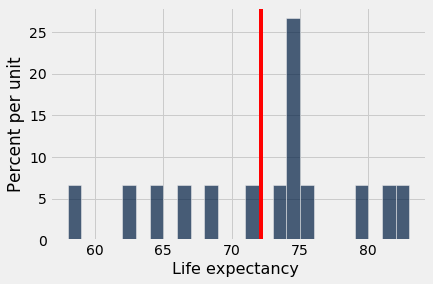

In [22]:
# We can show our mean in relation to the sample.

collected.hist(MEASURE, bins=get_bins(collected.column(MEASURE)))
plt.axvline(sample_mean, c='r')

In [152]:
# This is our ... ?

```
SAMPLE MEAN
```

What happens when we resample?

The resampled mean is:		 66.35333333333334 
Compared to the original:	 72.11999999999999


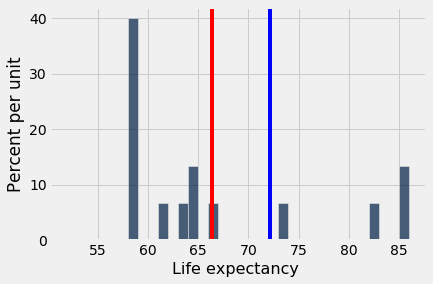

In [72]:
# Run this multiple time to see what changes.

resampled = collected.sample()
resampled_mean = np.mean(resampled.column(MEASURE))

print("The resampled mean is:\t\t", resampled_mean, "\nCompared to the original:\t", sample_mean)

resampled.hist(MEASURE, bins=get_bins(collected.column(MEASURE)))
plt.axvline(resampled_mean, c='r')
plt.axvline(sample_mean, c='b')

In [73]:
# This is our ... ?

```
RESAMPLED MEAN
```

Now, let's run the bootstrap so we can create our confidence interval!

(array([  1.,   0.,   4.,   1.,   4.,   9.,  17.,  33.,  69.,  84., 104.,
        141., 187., 216., 273., 291., 328., 370., 383., 373., 380., 332.,
        295., 237., 222., 175., 146., 108.,  68.,  44.,  47.,  21.,  20.,
          7.,   5.,   4.,   1.,   0.]),
 array([59. , 59.5, 60. , 60.5, 61. , 61.5, 62. , 62.5, 63. , 63.5, 64. ,
        64.5, 65. , 65.5, 66. , 66.5, 67. , 67.5, 68. , 68.5, 69. , 69.5,
        70. , 70.5, 71. , 71.5, 72. , 72.5, 73. , 73.5, 74. , 74.5, 75. ,
        75.5, 76. , 76.5, 77. , 77.5, 78. ]),
 <a list of 38 Patch objects>)

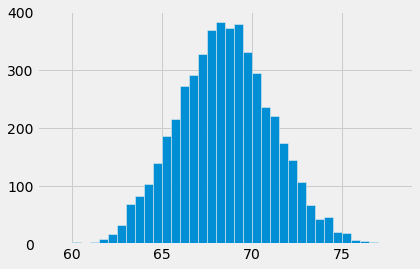

In [74]:
sample_means = []

for i in range(5000):
    bootstrapped = collected.sample()
    boot_mean = np.mean(bootstrapped.column(MEASURE))
    sample_means.append(boot_mean)

plt.hist(sample_means, bins=get_bins(sample_means, 0.5))

In [161]:
# This is our ... ?

```
DISTRIBUTION OF SAMPLE MEANS
```

Recall, the confidence interval uses percentiles as the bounds.

In [75]:
# First, we choose a confidence level.
confidence_level = 95

# What is the mean we're estimating?
mean = np.mean(sample_means)

# And then our lower and upper bounds?
# Let's try to find a way to calculate them regardless of our confidence level.
lower_bound = percentile((100 - confidence_level) / 2, sample_means)
upper_bound = percentile(confidence_level + (100 - confidence_level) / 2, sample_means)

# Printing it out so we can easily see our results.
print("""
 Mean:\t{}

Lower:\t{}
Upper:\t{}

Level:\t{}%
""".format(mean, lower_bound, upper_bound, confidence_level))


 Mean:	68.490712

Lower:	63.38666666666666
Upper:	73.66666666666667

Level:	95%



Out of curiosity... what's the difference between our bounds and the mean?

In [76]:
mean-lower_bound

5.104045333333339

In [77]:
upper_bound-mean

5.175954666666669

In [78]:
# How do we interpret this confidence interval?

```
We are 95% confidence that the mean life expectancy is between 67.85 and 76.07 years.
```

# Let's get a feel for how the distribution of sample means arises
---

We'll take a bunch of resamples and visualize the distribution as the number of resamples increases.

In [79]:
from IPython.display import clear_output

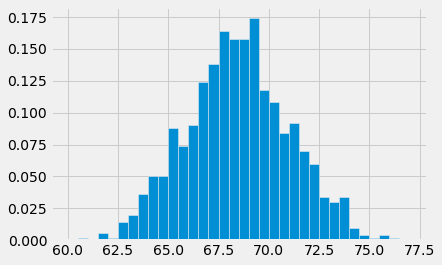

Resamples:	 1000


In [96]:
trials = 1000

sample_means = []

update_var = 1

for i in range(trials):
    boots = collected.sample()
    boot_mean = np.mean(boots.column(MEASURE))
    sample_means.append(boot_mean)
    
    # Update the plot every once in a while (more frequently at lower values)
    if i >= update_var - 1 or i==trials - 1:
        update_var *= 1.25
        clear_output(wait=True)
        
        plt.hist(sample_means, density=True, bins=get_bins(sample_means, 0.5))
        
        plt.pause(0.01)

        print("Resamples:\t",i + 1)

# A bit of recap
---

Let's draw some things on the chalkboard.

- Our **POPULATION DISTRIBUTION** is unknown, and can be any shape.


- A **SAMPLE DISTRIBUTION** should have a shape roughly similar to the population distribution.  
(provided that the sample was large enough and was properly randomized)


- A **SAMPLE MEAN** is just the mean of that sample distribution.


- We can collect a handful of sample means (or fake it by bootstrapping)


- The **DISTRIBUTION OF SAMPLE MEANS** will resemble a normal distribution as the number of sample means increases.


- The **CENTER/MEAN** of the distribution of sample means should be similar to the true population mean.  
(provided that our original sample was proper)

In [164]:
# Let's try this out on another column to see if the above claims hold!

# What if I told you there's another way?
---

Since we know that a normal distribution will arise as the number of resamples increases, then do we really need to go through all the effort of running a bootstrap?

Instead, we can rely on what we know about normal distributions!  The two defining features of a normal distribution are its center/mean and it's spread/standard deviation.

So, what's the standard deviation of the normal distribution that arises?

In [98]:
from scipy.stats import norm

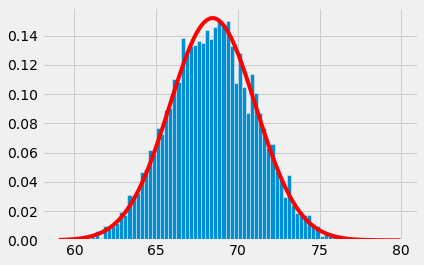

In [100]:
# Running a bootstrap again to get the distribution
resampled_means = [np.mean(collected.sample().column(MEASURE)) for i in range(5000)]
plt.hist(resampled_means, bins=get_bins(resampled_means, 0.25), density=True)



# Plotting a normal curve over the top of it.

mean = np.mean(collected.column(MEASURE)) # The mean should be ..?

std = np.std(collected.column(MEASURE) / np.sqrt(collected.num_rows)) # Let's figure out what the standard deviation should be!
# Well, it SHOULD be the Sample Size SD / sqrt(Sample Size)
# but we can't access the population sd!  So, we use the sample sd instead.

x = np.linspace(*plt.xlim(), 100)
plt.plot(x, norm.pdf(x, mean, std), c='r')

So, we can create our CI mathemagically instead of running the bootstrap!

For our normal curve, we'll have:
$$Mean = Sample\ Mean$$

$$Standard\ Deviation = \frac{Sample\ SD}{\sqrt{Sample\ Size}}$$

Now that we have a normal curve with a mean and standard deviation, how do we find the confidence interval from before?

In [101]:
# We know that 95% of data is within 1.96 standard deviations of
# the mean of a normal distribution.

mean = np.mean(collected.column(MEASURE))

# What's the SD of the distrib. of sample means again?
std = np.std(collected.column(MEASURE)) / np.sqrt(collected.num_rows)

lower_bound = mean - 1.96 * std
upper_bound = mean + 1.96 * std

print("""
 Mean:\t{}

Lower:\t{}
Upper:\t{}

Level:\t95%
""".format(mean, lower_bound, upper_bound))


 Mean:	68.46000000000001

Lower:	63.314791974575876
Upper:	73.60520802542413

Level:	95%



Just like before, I'm curious to see the difference between our bounds and mean.

In [166]:
mean-lower_bound

4.115923949914702

In [167]:
upper_bound-mean

4.115923949914702

In [168]:
# How close were we to our bootstrap confidence interval?

```
...
```

In [169]:
# What happens if we decrease/increase the number of resamples?

```
...
```

Cool!  Now, since we do have the *"population"* that we're estimating, let's check the validity of our confidence interval.

In [102]:
# What was the population mean?
pop_mean = np.mean(data.column(MEASURE))
pop_mean

71.61693989071038

In [103]:
# Is the population mean inside of our interval?
lower_bound <= pop_mean <= upper_bound

True

In [172]:
# How likely are we to have the true population mean within our interval?

```
95%
```

# Interval widths
---

What if we think our interval size is too big?  How does our interval size change as other parameters change?

In [173]:
# Provided that we want to keep 95% level of confidence, how will we narrow
# our interval width?

In [109]:
# BEFORE we answer that, let's think about one more thing:
#
# What is the width of our interval, in terms of our mean and standard deviation?


$$Interval\ Width = 4\cdot Sample\ SD$$
$$= 4\cdot \frac{Sample\ SD}{\sqrt{Sample\ Size}}$$

```
Sample more countries!
```

In [132]:
# Is there anything wrong with what we've done above?
# Hint: representative sample?

```
Our sample probably isn't big enough to be very reliable.
```

In [113]:
# What happens if we can't tolerate a 5% chance of being wrong?
#
# If this is really important, we may want 99.7% confidence!
#
# What will happen to the width of our interval?

```
Width increases as confidence increases.
```

In [111]:
# What will our interval width be in term of mean and standard deviation?

To answer this, we need to know the "Empirical Rule".

It goes a little something like this:

|# of SD away from mean|% of data contained in ± #SD|
|---|---|
|1|68%|
|2|95%|
|3|99.7%|

In [104]:
# So, we can calculate the CI if we need 99.7% confidence

mean = np.mean(collected.column(MEASURE))

std = np.std(collected.column(MEASURE)) / np.sqrt(collected.num_rows)

lower_bound_997 = mean - 3 * std
upper_bound_997 = mean + 3 * std

print("""
 Mean:\t{}

Lower:\t{}
Upper:\t{}

Level:\t95%
""".format(mean, lower_bound_997, upper_bound_997))


 Mean:	68.46000000000001

Lower:	60.58468159373858
Upper:	76.33531840626144

Level:	95%



In [105]:
# Let's look at the bounds for 95% versus 99.7% confidence
print("""
95% Lower:\t{0}\t99.7% Lower:\t{2}
95% Upper:\t{1}\t99.7% Upper:\t{3}
""".format(lower_bound, upper_bound, lower_bound_997, upper_bound_997))


95% Lower:	63.314791974575876	99.7% Lower:	60.58468159373858
95% Upper:	73.60520802542413	99.7% Upper:	76.33531840626144

